In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns #Control figure 
import numpy as np
import os
from datetime import date
matplotlib.style.use('ggplot')
%matplotlib inline

In [1]:
#import numpy as np
#import pandas as pd
#import os

In [2]:
#from sodapy import Socrata

In [3]:
#MyAppToken = ''

In [4]:
#client = Socrata("data.cityofnewyork.us", MyAppToken)

In [5]:
#results = client.get("dsg6-ifza", limit=2000)

In [6]:
#df = pd.DataFrame.from_records(results)

In [2]:
cwd = os.getcwd() #to get current working directory
#print(cwd)

In [2]:
df = pd.read_csv('../data/DOHMH_Childcare_Center_Inspections.csv', encoding = "L1")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52024 entries, 0 to 52023
Data columns (total 34 columns):
Center Name                                    52024 non-null object
Legal Name                                     52024 non-null object
Building                                       52013 non-null object
Street                                         52024 non-null object
Borough                                        52024 non-null object
ZipCode                                        51942 non-null float64
Phone                                          51977 non-null object
Permit Number                                  46227 non-null float64
Permit Expiration                              52024 non-null object
Status                                         52024 non-null object
Age Range                                      49708 non-null object
Maximum Capacity                               52024 non-null int64
Day Care ID                                    52024 non-null 

In [4]:
def clean_string(astr):
    return astr.lower().replace('.', '') \
        .replace(',', '') \
        .replace(';', '') \
        .replace(':', '') \
        .replace('á', 'a') \
        .replace('é', 'e') \
        .replace('í', 'i') \
        .replace('ó', 'o') \
        .replace('ú', 'u') \
        .replace(' ', '_') \
        .replace('ñ', 'ni')

In [5]:
def clean_columns(df):
    for series in df:
        df.rename(columns={series:clean_string(series)}, inplace=True)

In [6]:
#def execute(raw_dataset_path, clean_dataset_path):
    #print("\t-> Leyendo datos crudos a un DataFrame")
    #df = pd.read_csv('DOHMH_Childcare_Center_Inspections.csv')

In [6]:
print("\t-> Limpando columnas")

	-> Limpando columnas


In [7]:
clean_columns(df)

In [9]:
#df.info()

In [8]:
print("\t-> Reemplazando espacios en blanco")
for col in df.select_dtypes('object'):
    df[col] = df[col].replace('\s+', ' ', regex=True)

	-> Reemplazando espacios en blanco


In [9]:
print("\t-> Limpiando valores")
for col in df.select_dtypes('object'):
        df[col] = df[col].str.strip()
        df[col] = df[col].str.lower()
        df[col] = df[col].str.replace('á', 'a')
        df[col] = df[col].str.replace('é', 'e')
        df[col] = df[col].str.replace('í', 'i')
        df[col] = df[col].str.replace('ó', 'o')
        df[col] = df[col].str.replace('ú', 'u')
        df[col] = df[col].str.replace(' ', '_')

	-> Limpiando valores


In [10]:
print("\t-> Cambiando NA por np.nan")
for col in df.select_dtypes('object'):
    df.loc[df[col] == 'na', col] = np.nan

	-> Cambiando NA por np.nan


In [10]:
#print("\t-> Cuántos valores NaN tiene la base")

	-> Cuántos valores NaN tiene la base


In [ ]:
#df.isnull().sum()

In [11]:
print("\t-> Eliminar duplicados")

	-> Eliminar duplicados


In [12]:
df.duplicated().sum()

12653

In [13]:
df = df.drop_duplicates()
df.shape

(39371, 34)

In [ ]:
#print("\t-> Guardando la base limpia como clean.csv")

In [12]:
#df.to_csv('clean.csv', index=False)

### TABLA 3

In [14]:
#Seleccionamos sólo las columnas desde center_name hasta avg_critical_violation_rate
tabla_3 = df.iloc[:, 0:28] 

In [15]:
tabla_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39371 entries, 0 to 52023
Data columns (total 28 columns):
center_name                                    39371 non-null object
legal_name                                     39371 non-null object
building                                       39360 non-null object
street                                         39371 non-null object
borough                                        39371 non-null object
zipcode                                        39321 non-null float64
phone                                          39325 non-null object
permit_number                                  35549 non-null float64
permit_expiration                              39371 non-null object
status                                         39371 non-null object
age_range                                      37584 non-null object
maximum_capacity                               39371 non-null int64
day_care_id                                    39371 non-null 

In [16]:
tabla_3 = tabla_3.drop_duplicates()
tabla_3.shape

(2989, 28)

In [17]:
dummies = ["borough","program_type", "facility_type"]
df_1 = pd.get_dummies(tabla_3[dummies])

In [18]:
tabla_3 = tabla_3.join(df_1)

In [19]:
tabla_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2989 entries, 0 to 51837
Data columns (total 41 columns):
center_name                                    2989 non-null object
legal_name                                     2989 non-null object
building                                       2987 non-null object
street                                         2989 non-null object
borough                                        2989 non-null object
zipcode                                        2983 non-null float64
phone                                          2984 non-null object
permit_number                                  2546 non-null float64
permit_expiration                              2989 non-null object
status                                         2989 non-null object
age_range                                      2854 non-null object
maximum_capacity                               2989 non-null int64
day_care_id                                    2989 non-null object
program

In [20]:
tabla_3 = tabla_3.drop(df.columns[[0,1,2,3,4,5,6,7,8,9,10,13,14,15,16,17,18,19,21,23,25,27]], axis=1) 

In [21]:
tabla_3

,maximum_capacity,day_care_id,violation_rate_percent,total_educational_workers,public_health_hazard_violation_rate,critical_violation_rate,borough_bronx,borough_brooklyn,borough_manhattan,borough_queens,borough_staten_island,program_type_all_age_camp,program_type_infant_toddler,program_type_preschool,program_type_preschool_camp,program_type_school_age_camp,facility_type_camp,facility_type_gdc,facility_type_sbcc
0,0,dc20398,100.0,0,50.0,100.0,0,0,0,1,0,0,0,1,0,0,0,0,1
9,0,dc32499,0.0,0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,1
14,0,dc39362,NaN,0,NaN,NaN,0,0,1,0,0,0,0,1,0,0,0,0,1
16,0,dc36458,NaN,0,NaN,NaN,0,0,1,0,0,0,0,1,0,0,0,0,1
17,0,dc35665,NaN,0,NaN,NaN,0,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50457,44,dc37674,NaN,7,NaN,NaN,0,0,1,0,0,0,0,1,0,0,0,1,0
50540,50,dc36839,0.0,4,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,1,0
50625,50,dc38475,0.0,0,0.0,0.0,0,0,1,0,0,1,0,0,0,0,1,0,0
50968,28,dc38893,NaN,1,NaN,NaN,0,0,1,0,0,0,0,1,0,0,0,1,0


### TABLA 4

In [23]:
#Seleccionando las variables dinamicas de la tabla limpia
tabla_4 = df.iloc[:, [4,12,28,29,30,31,32,33]]

In [24]:
#Creando variables
print("\t-> Dividir en tres variables Inspection Summary Result: reason, result_1 y result_2")
tabla_4['inspection_summary_result'] = tabla_4['inspection_summary_result'].astype('str')
df_3 = pd.DataFrame(tabla_4.inspection_summary_result.str.split('_-_',1).tolist(), columns= ['reason', 'result'])
df_3['result'] = df_3['result'].astype('str')
df_4 = pd.DataFrame(df_3.result.str.split(';_',1).tolist(), columns = ['result_1', 'result_2'])
df_3 = df_3.drop(df_3.columns[[1]], axis=1) 
df_4 = df_4.join(df_3)
tabla_4 = tabla_4.join(df_4)
tabla_4 = tabla_4.drop(['inspection_summary_result'], axis = 1) #Eliminar inspection_summary_result
print("\t-> A la variable reason la hacemos dummy, es decir, initial annual inspection es 1 y en otro caso es cero")
tabla_4.reason.value_counts(dropna=False)
tabla_4['initial_annual_inspection'] = tabla_4.reason.apply(lambda x: 1 if x == "initial_annual_inspection" else 0)
tabla_4.initial_annual_inspection.value_counts(dropna=False)
print("\t-> A la variable reason la hacemos dummy, es decir, initial annual inspection es 1 y en otro caso es cero")
tabla_4.initial_annual_inspection.value_counts(dropna=False)
tabla_4 = tabla_4.drop(['reason'], axis=1) #Eliminamos la variable reason
print("\t-> Creamos dummies a las variables result_1 y result_2")
dummies = ["result_1", "result_2"]
df_2 = pd.get_dummies(tabla_4[dummies])
tabla_4 = tabla_4.join(df_2)
tabla_4 = tabla_4.drop(['result_1', 'result_2'], axis = 1) #Eliminamos variables que no necesitamos
print("\t-> Creamos variables de año, mes y día a partir de Inspection date")
tabla_4['inspection_date'] = pd.to_datetime(tabla_4.inspection_date, format = '%m/%d/%Y')
tabla_4['inspection_year'] = tabla_4['inspection_date'].dt.year
tabla_4['inspection_month_name'] = tabla_4['inspection_date'].dt.month_name()
tabla_4['inspection_day_name'] = tabla_4['inspection_date'].dt.day_name()
print("\t-> Eliminamos días festivos, sábado y domingo ")
tabla_4 = tabla_4.drop(tabla_4.loc[tabla_4['inspection_day_name']== 'Saturday'].index)
tabla_4 = tabla_4.drop(tabla_4.loc[tabla_4['inspection_day_name']== 'Sunday'].index)
print("\t-> Poner como primer columna center_id e inspection_date")
tabla_4.rename(columns={'day_care_id':'center_id'}, inplace=True)
def order(frame,var): 
    varlist =[w for w in frame.columns if w not in var] 
    frame = frame[var+varlist] 
    return frame
tabla_4 = order(tabla_4,['center_id', 'inspection_date'])
print("\t-> Ordenamos la base por year, month y day en forma descendente")
tabla_4.sort_values(['inspection_date'], ascending=[False], inplace=True)
print("\t-> Creamos dummy = 1 si existió violación")
tabla_4.violation_category.value_counts(dropna=False)
tabla_4['violation'] = tabla_4['violation_category'].apply(lambda x: not pd.isnull(x))
tabla_4['violation'] = tabla_4['violation'].apply(lambda x: 1 if x == True else 0)
tabla_4.violation.value_counts(dropna=False)
print("\t-> Creamos dummy = 1 si existió violación y es un problema de salud pública")
tabla_4['public_hazard'] = tabla_4['violation_category'].apply(lambda x: 1 if x == 'public_health_hazard' else 0)
tabla_4.public_hazard.value_counts(dropna=False)
print("\t-> Creamos la variable violaciones_hist_salud_publica: Número de violaciones de salud pública históricas (2016-2019) por centro")
tabla_4['violaciones_hist_salud_publica'] = tabla_4.public_hazard[(tabla_4.inspection_year != 2020)]
df_4 = tabla_4.groupby('center_id').violaciones_hist_salud_publica.sum().reset_index()
tabla_4 = pd.merge(left=tabla_4,right=df_4, how='left', left_on='center_id', right_on='center_id')
tabla_4 = tabla_4.drop(['violaciones_hist_salud_publica_x'], axis=1) #Eliminamos la variable repetida
tabla_4.rename(columns={'violaciones_hist_salud_publica_y':'violaciones_hist_salud_publica'}, inplace=True)
print("\t-> Creamos la variable violaciones_2019_salud_publica: Número de violaciones de salud pública en el 2019 por centro")
tabla_4['violaciones_2019_salud_publica'] = tabla_4.public_hazard[(tabla_4.inspection_year == 2019)]
df_5 = tabla_4.groupby('center_id').violaciones_2019_salud_publica.sum().reset_index()
tabla_4 = pd.merge(left=tabla_4,right=df_5, how='left', left_on='center_id', right_on='center_id')
tabla_4 = tabla_4.drop(['violaciones_2019_salud_publica_x'], axis=1) #Eliminamos la variable repetida
tabla_4.rename(columns={'violaciones_2019_salud_publica_y':'violaciones_2019_salud_publica'}, inplace=True)
print("\t-> Creamos la variable violaciones_hist_criticas: Número de violaciones críticas históricas anteriores (2016-2019) por centro")
tabla_4['violation_critical'] = tabla_4['violation_category'].apply(lambda x: 1 if x == 'critical' else 0)
tabla_4['violaciones_hist_criticas'] = tabla_4.violation_critical[(tabla_4.inspection_year != 2020)]
df_6 = tabla_4.groupby('center_id').violaciones_hist_criticas.sum().reset_index()
tabla_4 = pd.merge(left=tabla_4,right=df_6, how='left', left_on='center_id', right_on='center_id')
tabla_4 = tabla_4.drop(['violaciones_hist_criticas_x'], axis=1) #Eliminamos la variable repetida
tabla_4.rename(columns={'violaciones_hist_criticas_y':'violaciones_hist_criticas'}, inplace=True)
print("\t-> Creamos la variable violaciones_2019_criticas: Número de violaciones críticas en el 2019 por centro")
tabla_4['violaciones_2019_criticas'] = tabla_4.violation_critical[(tabla_4.inspection_year == 2019)]
df_7 = tabla_4.groupby('center_id').violaciones_2019_criticas.sum().reset_index()
tabla_4 = pd.merge(left=tabla_4,right=df_7, how='left', left_on='center_id', right_on='center_id')
tabla_4 = tabla_4.drop(['violaciones_2019_criticas_x'], axis=1) #Eliminamos la variable repetida
tabla_4.rename(columns={'violaciones_2019_criticas_y':'violaciones_2019_criticas'}, inplace=True)
print("\t-> Creamos la variable ratio_violaciones_hist: Número de inspecciones en total de primera vez que resultaron en violación crítica o de salud pública/ número de inspecciones de primera vez por centro")
df_8 = tabla_4.loc[tabla_4['inspection_year'] != 2020]
df_9 = df_8[df_8.violation_category.isin(['critical', 'public_health_hazard']) & df_8['initial_annual_inspection']==1]
df_10 = df_9.groupby('center_id').initial_annual_inspection.sum().reset_index()
df_11 = tabla_4.groupby('center_id').initial_annual_inspection.sum().reset_index()
df_12 = pd.merge(left=df_11,right=df_10, how='left', left_on='center_id', right_on='center_id')
df_12['ratio_violaciones_hist'] = df_12['initial_annual_inspection_y'] / df_12['initial_annual_inspection_x']
tabla_4 = pd.merge(left=tabla_4,right=df_12, how='left', left_on='center_id', right_on='center_id')
tabla_4 = tabla_4.drop(['initial_annual_inspection_x', 'initial_annual_inspection_y'], axis=1) #Eliminamos variables que no necesitamos 
print("\t-> Creamos la variable ratio_violaciones_2019: Número de inspecciones en total de primera vez que resultaron en violación crítica o de salud pública en el 2019 / número de inspecciones de primera vez por centro")
df_13 = tabla_4.loc[tabla_4['inspection_year'] == 2019]
df_14 = df_13[df_13.violation_category.isin(['critical', 'public_health_hazard']) & df_13['initial_annual_inspection']==1]
df_15 = df_14.groupby('center_id').initial_annual_inspection.sum().reset_index()
df_16 = pd.merge(left=df_11,right=df_15, how='left', left_on='center_id', right_on='center_id')
df_16['ratio_violaciones_2019'] = df_16['initial_annual_inspection_y'] / df_16['initial_annual_inspection_x']
tabla_4 = pd.merge(left=tabla_4,right=df_16, how='left', left_on='center_id', right_on='center_id')
tabla_4 = tabla_4.drop(['initial_annual_inspection_x','initial_annual_inspection_y'], axis=1) #Eliminamos variables que no necesitamos 
print("\t-> Creamos la variable prom_violaciones_hist_borough: Promedio de violaciones históricas por distrito")
df_17 = tabla_4.loc[tabla_4['inspection_year'] != 2020]
df_18 = df_17.groupby('borough').violation.mean().reset_index()
tabla_4 = pd.merge(left=tabla_4,right=df_18, how='left', left_on='borough', right_on='borough')
tabla_4.rename(columns={'violation_y':'prom_violaciones_hist_borough'}, inplace=True)
tabla_4.rename(columns={'violation_x':'violation'}, inplace=True)
print("\t-> Creamos la variable prom_violaciones_2019_borough: Promedio de violaciones en el 2019 por distrito")
df_19 = tabla_4.loc[tabla_4['inspection_year'] == 2019]
df_20 = df_19.groupby('borough').violation.mean().reset_index()
tabla_4 = pd.merge(left=tabla_4,right=df_20, how='left', left_on='borough', right_on='borough')
tabla_4.rename(columns={'violation_y':'prom_violaciones_2019_borough'}, inplace=True)
tabla_4.rename(columns={'violation_x':'violation'}, inplace=True)
print("\t-> Creamos la variable ratio_violaciones_hist_sp: Número de violaciones de salud pública de primera vez por centro históricas (2017-2019)/ número de violaciones de primera vez de todo tipo por centro históricas (2017-2019) ")
df_21 = tabla_4.loc[tabla_4['inspection_year'] != 2020]
df_22 = df_21.loc[df_21['initial_annual_inspection'] == 1]
df_23 = df_22.groupby('center_id').public_hazard.sum().reset_index()
df_24 = df_22.groupby('center_id').violation.sum().reset_index()
df_25 = pd.merge(left=df_23,right=df_24, how='left', left_on='center_id', right_on='center_id')
df_25['ratio_violaciones_hist_sp'] = df_25['public_hazard'] / df_25['violation']
tabla_4 = pd.merge(left=tabla_4,right=df_25, how='left', left_on='center_id', right_on='center_id')
tabla_4 = tabla_4.drop(['public_hazard_y','violation_y'], axis=1) #Eliminamos variables que no necesitamos 
tabla_4.rename(columns={'violation_x':'violation'}, inplace=True)
tabla_4.rename(columns={'public_hazard_x':'public_hazard'}, inplace=True)
print("\t-> Creamos la variable ratio_violaciones_2019_sp: Número de violaciones de salud pública de primera vez por centro en el 2019 / número de violaciones de primera vez de todo tipo por centro en el 2019 ")
df_26 = tabla_4.loc[tabla_4['inspection_year'] == 2019]
df_27 = df_26.loc[df_26['initial_annual_inspection'] == 1]
df_28 = df_27.groupby('center_id').public_hazard.sum().reset_index()
df_29 = df_27.groupby('center_id').violation.sum().reset_index()
df_30 = pd.merge(left=df_28,right=df_29, how='left', left_on='center_id', right_on='center_id')
df_30['ratio_violaciones_2019_sp'] = df_30['public_hazard'] / df_30['violation']
tabla_4 = pd.merge(left=tabla_4,right=df_30, how='left', left_on='center_id', right_on='center_id')
tabla_4 = tabla_4.drop(['public_hazard_y','violation_y'], axis=1) #Eliminamos variables que no necesitamos 
tabla_4.rename(columns={'violation_x':'violation'}, inplace=True)
tabla_4.rename(columns={'public_hazard_x':'public_hazard'}, inplace=True)
print("\t-> Creamos la variable ratio_violaciones_hist_criticas: Número de violaciones críticas de primera vez por centro históricas (2017-2019)/ número de violaciones de primera vez de todo tipo por centro históricas (2017-2019)")
df_31 = tabla_4.loc[tabla_4['inspection_year'] != 2020]
df_32 = df_31.loc[df_31['initial_annual_inspection'] == 1]
df_33 = df_32.groupby('center_id').violation_critical.sum().reset_index()
df_34 = df_32.groupby('center_id').violation.sum().reset_index()
df_35 = pd.merge(left=df_33,right=df_34, how='left', left_on='center_id', right_on='center_id')
df_35['ratio_violaciones_hist_criticas'] = df_35['violation_critical'] / df_35['violation']
tabla_4 = pd.merge(left=tabla_4,right=df_35, how='left', left_on='center_id', right_on='center_id')
tabla_4 = tabla_4.drop(['violation_critical_y','violation_y'], axis=1) #Eliminamos variables que no necesitamos 
tabla_4.rename(columns={'violation_x':'violation'}, inplace=True)
tabla_4.rename(columns={'violation_critical_x':'violation_critical'}, inplace=True)
print("\t-> Creamos la variable ratio_violaciones_2019_criticas: Número de violaciones críticas de primera vez por centro en el 2019/ número de violaciones de primera vez de todo tipo por centro en el 2019")
df_36 = tabla_4.loc[tabla_4['inspection_year'] == 2019]
df_37 = df_36.loc[df_36['initial_annual_inspection'] == 1]
df_38 = df_37.groupby('center_id').violation_critical.sum().reset_index()
df_39 = df_37.groupby('center_id').violation.sum().reset_index()
df_40 = pd.merge(left=df_38,right=df_39, how='left', left_on='center_id', right_on='center_id')
df_40['ratio_violaciones_2019_criticas'] = df_40['violation_critical'] / df_40['violation']
tabla_4 = pd.merge(left=tabla_4,right=df_40, how='left', left_on='center_id', right_on='center_id')
tabla_4 = tabla_4.drop(['violation_critical_y','violation_y'], axis=1) #Eliminamos variables que no necesitamos 
tabla_4.rename(columns={'violation_x':'violation'}, inplace=True)
tabla_4.rename(columns={'violation_critical_x':'violation_critical'}, inplace=True)
tabla_4.info()

	-> Dividir en tres variables Inspection Summary Result: reason, result_1 y result_2


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


	-> A la variable reason la hacemos dummy, es decir, initial annual inspection es 1 y en otro caso es cero
	-> A la variable reason la hacemos dummy, es decir, initial annual inspection es 1 y en otro caso es cero
	-> Creamos dummies a las variables result_1 y result_2
	-> Creamos variables de año, mes y día a partir de Inspection date
	-> Eliminamos días festivos, sábado y domingo 
	-> Poner como primer columna center_id e inspection_date
	-> Ordenamos la base por year, month y day en forma descendente
	-> Creamos dummy = 1 si existió violación
	-> Creamos dummy = 1 si existió violación y es un problema de salud pública
	-> Creamos la variable violaciones_hist_salud_publica: Número de violaciones de salud pública históricas (2016-2019) por centro
	-> Creamos la variable violaciones_2019_salud_publica: Número de violaciones de salud pública en el 2019 por centro
	-> Creamos la variable violaciones_hist_criticas: Número de violaciones críticas históricas anteriores (2016-2019) por centr

### TABLA 5

In [25]:
tabla_5 = tabla_4.join(tabla_3, lsuffix='_caller', rsuffix='_other')

In [26]:
tabla_5 = tabla_5.set_index(['center_id', 'inspection_date'])

In [27]:
tabla_5.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 39363 entries, (dc11190, 2020-04-09 00:00:00) to (dc38414, nan)
Data columns (total 53 columns):
borough                                                39363 non-null object
regulation_summary                                     39307 non-null object
violation_category                                     23870 non-null object
health_code_sub_section                                23870 non-null object
violation_status                                       23870 non-null object
initial_annual_inspection                              39363 non-null int64
result_1_None                                          39363 non-null uint8
result_1_passed_inspection                             39363 non-null uint8
result_1_passed_inspection_with_no_violations          39363 non-null uint8
result_1_previously_cited_violations_corrected         39363 non-null uint8
result_1_previously_closed_program_re-opened           39363 non-null uint8
result_1_rei

In [28]:
tabla_5 = tabla_5.drop(tabla_5.columns[[0,1,2,3,4,17,18,35]], axis=1) #Eliminamos variables que no necesitamos 

In [29]:
tabla_5.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 39363 entries, (dc11190, 2020-04-09 00:00:00) to (dc38414, nan)
Data columns (total 45 columns):
initial_annual_inspection                              39363 non-null int64
result_1_None                                          39363 non-null uint8
result_1_passed_inspection                             39363 non-null uint8
result_1_passed_inspection_with_no_violations          39363 non-null uint8
result_1_previously_cited_violations_corrected         39363 non-null uint8
result_1_previously_closed_program_re-opened           39363 non-null uint8
result_1_reinspection_not_required                     39363 non-null uint8
result_1_reinspection_required                         39363 non-null uint8
result_2_fines_pending                                 39363 non-null uint8
result_2_program_closed                                39363 non-null uint8
result_2_violations_corrected_at_time_of_inspection    39363 non-null uint8
inspection_year  

In [30]:
tabla_5 = tabla_5.fillna(0)

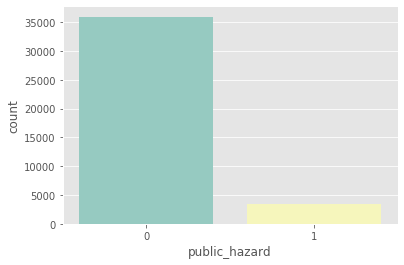

In [31]:
sns.countplot(x='public_hazard', data=tabla_5, palette="Set3")

In [32]:
count_class_0, count_class_1 = tabla_5.public_hazard.value_counts()

Accuracy: 0.7076923076923077
Precision: 0.721106412966878
Recall: 0.6987390029325513
Mean squared error: 0.29


,features,importance
12,violation,0.294794
13,violaciones_hist_salud_publica,0.206266
15,violation_critical,0.199915
22,ratio_violaciones_hist_sp,0.076601
14,violaciones_2019_salud_publica,0.038049
11,inspection_year,0.035787
18,ratio_violaciones_hist,0.031486
0,initial_annual_inspection,0.026578
23,ratio_violaciones_2019_sp,0.015729
16,violaciones_hist_criticas,0.013040


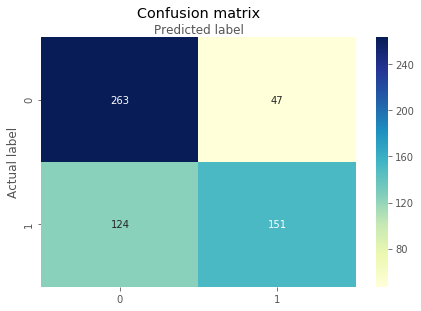

In [33]:
df_class_0 = tabla_5[tabla_5['public_hazard'] == 0]
df_class_1 = tabla_5[tabla_5['public_hazard'] == 1]
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_class_1, df_class_0_over], axis=0)

#Entrenamiento y validación
df_train = df_test_over.loc[df_test_over['inspection_year'] != 2020]
df_test = df_test_over.loc[df_test_over['inspection_year'] == 2020]
Y_train = df_train[['public_hazard']]
Y_test = df_test[['public_hazard']]
X_train = df_train[[i for i in df_train.keys() if i not in Y_train]]
X_test = df_test[[i for i in df_test.keys() if i not in Y_test]]

import sklearn as sk
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error

np.random.seed(0)
rforest = RandomForestClassifier(n_estimators=600, class_weight="balanced", max_depth=8, criterion='gini')
rforest.fit(X_train,Y_train.values.ravel())
Y_pred = rforest.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred, average='macro'))
print("Recall:",metrics.recall_score(Y_test, Y_pred, average='macro'))
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))

rforest_matrix=metrics.confusion_matrix(Y_test,Y_pred)

pd.DataFrame(rforest_matrix)

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(rforest_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

feature_importance_frame = pd.DataFrame()
feature_importance_frame['features'] = list(X_train.keys())
feature_importance_frame['importance'] = list(rforest.feature_importances_)
feature_importance_frame = feature_importance_frame.sort_values(
        'importance', ascending=False)
feature_importance_frame



### HASTA EL CHECKPOINT4

In [29]:
print("\t-> Reagrupar en tres variables Inspection Summary Result: reason, result_1 y result_2")

	-> Reagrupar en tres variables Inspection Summary Result: reason, result_1 y result_2


In [30]:
df['inspection_summary_result'] = df['inspection_summary_result'].astype('str')

In [31]:
df_3 = pd.DataFrame(df.inspection_summary_result.str.split('_-_',1).tolist(), columns= ['reason', 'result'])

In [32]:
df_3['result'] = df_3['result'].astype('str')

In [33]:
df_4 = pd.DataFrame(df_3.result.str.split(';_',1).tolist(), columns = ['result_1', 'result_2'])

In [34]:
df_3 = df_3.drop(df_3.columns[[1]], axis=1) 

In [35]:
df = pd.concat([df, df_3, df_4], axis=1)

In [36]:
df = df.drop(['inspection_summary_result'], axis = 1) #Eliminar inspection_summary_result

In [37]:
print("\t-> A la variable reason la hacemos dummy, es decir, initial annual inspection es 1 y en otro caso es cero")

	-> A la variable reason la hacemos dummy, es decir, initial annual inspection es 1 y en otro caso es cero


In [38]:
df.reason.value_counts(dropna=False)

initial_annual_inspection                       25075
nan                                             11690
compliance_inspection_of_open_violations         6857
monitoring_inspection_non-routine                5223
NaN                                              2386
lead_based_paint_or_lead_in_water_inspection       75
Name: reason, dtype: int64

In [39]:
df['initial_annual_inspection'] = df.reason.apply(lambda x: 1 if x == "initial_annual_inspection" else 0)

In [40]:
df.initial_annual_inspection.value_counts(dropna=False)

0    26231
1    25075
Name: initial_annual_inspection, dtype: int64

In [41]:
df = df.drop(['reason'], axis=1) #Eliminamos la variable reason

In [42]:
print("\t-> Creamos dummies a las variables result_1 y result_2")

	-> Creamos dummies a las variables result_1 y result_2


In [43]:
dummies = ["result_1", "result_2"]
df_2 = df[[i for i in df.keys() if i not in dummies]]
df_3 = pd.get_dummies(df[dummies])

In [44]:
df = pd.concat([df_2.reset_index(drop=True), df_3], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51889 entries, 0 to 52023
Data columns (total 57 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   center_name                                          39371 non-null  object 
 1   legal_name                                           39371 non-null  object 
 2   building                                             39360 non-null  object 
 3   street                                               39371 non-null  object 
 4   borough                                              39371 non-null  object 
 5   zipcode                                              39321 non-null  float64
 6   phone                                                39325 non-null  object 
 7   permit_number                                        35549 non-null  float64
 8   permit_expiration                                    39371 non-nul

In [45]:
print("\t-> Creamos variables de año, mes y día a partir de Inspection date")

	-> Creamos variables de año, mes y día a partir de Inspection date


In [46]:
df['inspection_date'] = pd.to_datetime(df.inspection_date, format = '%m/%d/%Y')

In [47]:
df['inspection_year'] = df['inspection_date'].dt.year

In [48]:
df['inspection_month_name'] = df['inspection_date'].dt.month_name()

In [49]:
df['inspection_day_name'] = df['inspection_date'].dt.day_name()

In [50]:
print("\t-> Eliminamos días festivos, sábado y domingo ")

	-> Eliminamos días festivos, sábado y domingo 


In [51]:
df = df.drop(df.loc[df['inspection_day_name']== 'Saturday'].index)

In [52]:
df = df.drop(df.loc[df['inspection_day_name']== 'Sunday'].index)

In [53]:
print("\t-> Poner como primer columna center_id e inspection_date")

	-> Poner como primer columna center_id e inspection_date


In [54]:
df.rename(columns={'day_care_id':'center_id'}, inplace=True)

In [55]:
def order(frame,var): 
    varlist =[w for w in frame.columns if w not in var] 
    frame = frame[var+varlist] 
    return frame

In [56]:
df = order(df,['center_id', 'inspection_date'])

In [57]:
print("\t-> Ordenamos la base por year, month y day en forma descendente")

	-> Ordenamos la base por year, month y day en forma descendente


In [58]:
df.sort_values(['inspection_date'], ascending=[False], inplace=True)

In [59]:
print("\t-> Creamos dummy = 1 si existió violación")

	-> Creamos dummy = 1 si existió violación


In [60]:
df.violation_category.value_counts(dropna=False)

NaN                     28011
general                 12136
critical                 8338
public_health_hazard     3396
Name: violation_category, dtype: int64

In [61]:
df['violation'] = df['violation_category'].apply(lambda x: not pd.isnull(x))

In [62]:
df['violation'] = df['violation'].apply(lambda x: 1 if x == True else 0)

In [63]:
df.violation.value_counts(dropna=False)

0    28011
1    23870
Name: violation, dtype: int64

In [64]:
print("\t-> Creamos dummy = 1 si existió violación y es un problema de salud pública")

	-> Creamos dummy = 1 si existió violación y es un problema de salud pública


In [65]:
df['public_hazard'] = df['violation_category'].apply(lambda x: 1 if x == 'public_health_hazard' else 0)

In [66]:
df.public_hazard.value_counts(dropna=False)

0    48485
1     3396
Name: public_hazard, dtype: int64

In [67]:
print("\t-> Creamos la variable violaciones_hist_salud_publica: Número de violaciones de salud pública históricas (2016-2019) por centro")

	-> Creamos la variable violaciones_hist_salud_publica: Número de violaciones de salud pública históricas (2016-2019) por centro


In [68]:
df['violaciones_hist_salud_publica'] = df.public_hazard[(df.inspection_year != 2020)]

In [69]:
df_4 = df.groupby('center_id').violaciones_hist_salud_publica.sum().reset_index()

In [70]:
df = pd.merge(left=df,right=df_4, how='left', left_on='center_id', right_on='center_id')

In [71]:
df = df.drop(['violaciones_hist_salud_publica_x'], axis=1) #Eliminamos la variable repetida

In [72]:
df.rename(columns={'violaciones_hist_salud_publica_y':'violaciones_hist_salud_publica'}, inplace=True)

In [73]:
print("\t-> Creamos la variable violaciones_2019_salud_publica: Número de violaciones de salud pública en el 2019 por centro")

	-> Creamos la variable violaciones_2019_salud_publica: Número de violaciones de salud pública en el 2019 por centro


In [74]:
df['violaciones_2019_salud_publica'] = df.public_hazard[(df.inspection_year == 2019)]

In [75]:
df_5 = df.groupby('center_id').violaciones_2019_salud_publica.sum().reset_index()

In [76]:
df = pd.merge(left=df,right=df_5, how='left', left_on='center_id', right_on='center_id')

In [77]:
df = df.drop(['violaciones_2019_salud_publica_x'], axis=1) #Eliminamos la variable repetida

In [78]:
df.rename(columns={'violaciones_2019_salud_publica_y':'violaciones_2019_salud_publica'}, inplace=True)

In [79]:
print("\t-> Creamos la variable violaciones_hist_criticas: Número de violaciones críticas históricas anteriores (2016-2019) por centro")

	-> Creamos la variable violaciones_hist_criticas: Número de violaciones críticas históricas anteriores (2016-2019) por centro


In [80]:
df['violation_critical'] = df['violation_category'].apply(lambda x: 1 if x == 'critical' else 0)

In [81]:
df['violaciones_hist_criticas'] = df.violation_critical[(df.inspection_year != 2020)]

In [82]:
df_6 = df.groupby('center_id').violaciones_hist_criticas.sum().reset_index()

In [83]:
df = pd.merge(left=df,right=df_6, how='left', left_on='center_id', right_on='center_id')

In [84]:
df = df.drop(['violaciones_hist_criticas_x'], axis=1) #Eliminamos la variable repetida

In [85]:
df.rename(columns={'violaciones_hist_criticas_y':'violaciones_hist_criticas'}, inplace=True)

In [86]:
print("\t-> Creamos la variable violaciones_2019_criticas: Número de violaciones críticas en el 2019 por centro")

	-> Creamos la variable violaciones_2019_criticas: Número de violaciones críticas en el 2019 por centro


In [87]:
df['violaciones_2019_criticas'] = df.violation_critical[(df.inspection_year == 2019)]

In [88]:
df_7 = df.groupby('center_id').violaciones_2019_criticas.sum().reset_index()

In [89]:
df = pd.merge(left=df,right=df_7, how='left', left_on='center_id', right_on='center_id')

In [90]:
df = df.drop(['violaciones_2019_criticas_x'], axis=1) #Eliminamos la variable repetida

In [91]:
df.rename(columns={'violaciones_2019_criticas_y':'violaciones_2019_criticas'}, inplace=True)

In [92]:
print("\t-> Creamos la variable ratio_violaciones_hist: Número de inspecciones en total de primera vez que resultaron en violación crítica o de salud pública/ número de inspecciones de primera vez por centro")

	-> Creamos la variable ratio_violaciones_hist: Número de inspecciones en total de primera vez que resultaron en violación crítica o de salud pública/ número de inspecciones de primera vez por centro


In [93]:
df_8 = df.loc[df['inspection_year'] != 2020]

In [94]:
df_9 = df_8[df_8.violation_category.isin(['critical', 'public_health_hazard']) & df_8['initial_annual_inspection']==1]

In [95]:
df_10 = df_9.groupby('center_id').initial_annual_inspection.sum().reset_index()

In [96]:
df_11 = df.groupby('center_id').initial_annual_inspection.sum().reset_index()

In [97]:
df_12 = pd.merge(left=df_11,right=df_10, how='left', left_on='center_id', right_on='center_id')

In [98]:
df_12['ratio_violaciones_hist'] = df_12['initial_annual_inspection_y'] / df_12['initial_annual_inspection_x']

In [99]:
df = pd.merge(left=df,right=df_12, how='left', left_on='center_id', right_on='center_id')

In [100]:
df = df.drop(['initial_annual_inspection_x', 'initial_annual_inspection_y'], axis=1) #Eliminamos variables que no necesitamos 

In [101]:
print("\t-> Creamos la variable ratio_violaciones_2019: Número de inspecciones en total de primera vez que resultaron en violación crítica o de salud pública en el 2019 / número de inspecciones de primera vez por centro")

	-> Creamos la variable ratio_violaciones_2019: Número de inspecciones en total de primera vez que resultaron en violación crítica o de salud pública en el 2019 / número de inspecciones de primera vez por centro


In [102]:
df_13 = df.loc[df['inspection_year'] == 2019]

In [103]:
df_14 = df_13[df_13.violation_category.isin(['critical', 'public_health_hazard']) & df_13['initial_annual_inspection']==1]

In [104]:
df_15 = df_14.groupby('center_id').initial_annual_inspection.sum().reset_index()

In [105]:
df_16 = pd.merge(left=df_11,right=df_15, how='left', left_on='center_id', right_on='center_id')

In [106]:
df_16['ratio_violaciones_2019'] = df_16['initial_annual_inspection_y'] / df_16['initial_annual_inspection_x']

In [107]:
df = pd.merge(left=df,right=df_16, how='left', left_on='center_id', right_on='center_id')

In [108]:
df = df.drop(['initial_annual_inspection_x','initial_annual_inspection_y'], axis=1) #Eliminamos variables que no necesitamos 

In [109]:
print("\t-> Creamos la variable prom_violaciones_hist_borough: Promedio de violaciones históricas por distrito")

	-> Creamos la variable prom_violaciones_hist_borough: Promedio de violaciones históricas por distrito


In [110]:
df_17 = df.loc[df['inspection_year'] != 2020]

In [111]:
df_18 = df_17.groupby('borough').violation.mean().reset_index()

In [112]:
df = pd.merge(left=df,right=df_18, how='left', left_on='borough', right_on='borough')

In [113]:
df.rename(columns={'violation_y':'prom_violaciones_hist_borough'}, inplace=True)

In [114]:
df.rename(columns={'violation_x':'violation'}, inplace=True)

In [115]:
print("\t-> Creamos la variable prom_violaciones_2019_borough: Promedio de violaciones en el 2019 por distrito")

	-> Creamos la variable prom_violaciones_2019_borough: Promedio de violaciones en el 2019 por distrito


In [116]:
df_19 = df.loc[df['inspection_year'] == 2019]

In [117]:
df_20 = df_19.groupby('borough').violation.mean().reset_index()

In [118]:
df = pd.merge(left=df,right=df_20, how='left', left_on='borough', right_on='borough')

In [119]:
df.rename(columns={'violation_y':'prom_violaciones_2019_borough'}, inplace=True)

In [120]:
df.rename(columns={'violation_x':'violation'}, inplace=True)

In [121]:
print("\t-> Creamos la variable ratio_violaciones_hist_sp: Número de violaciones de salud pública de primera vez por centro históricas (2017-2019)/ número de violaciones de primera vez de todo tipo por centro históricas (2017-2019) ")

	-> Creamos la variable ratio_violaciones_hist_sp: Número de violaciones de salud pública de primera vez por centro históricas (2017-2019)/ número de violaciones de primera vez de todo tipo por centro históricas (2017-2019) 


In [122]:
df_21 = df.loc[df['inspection_year'] != 2020]

In [123]:
df_22 = df_21.loc[df_21['initial_annual_inspection'] == 1]

In [124]:
df_23 = df_22.groupby('center_id').public_hazard.sum().reset_index()

In [125]:
df_24 = df_22.groupby('center_id').violation.sum().reset_index()

In [126]:
df_25 = pd.merge(left=df_23,right=df_24, how='left', left_on='center_id', right_on='center_id')

In [127]:
df_25['ratio_violaciones_hist_sp'] = df_25['public_hazard'] / df_25['violation']

In [128]:
df = pd.merge(left=df,right=df_25, how='left', left_on='center_id', right_on='center_id')

In [129]:
df = df.drop(['public_hazard_y','violation_y'], axis=1) #Eliminamos variables que no necesitamos 

In [130]:
df.rename(columns={'violation_x':'violation'}, inplace=True)

In [131]:
df.rename(columns={'public_hazard_x':'public_hazard'}, inplace=True)

In [132]:
print("\t-> Creamos la variable ratio_violaciones_2019_sp: Número de violaciones de salud pública de primera vez por centro en el 2019 / número de violaciones de primera vez de todo tipo por centro en el 2019 ")

	-> Creamos la variable ratio_violaciones_2019_sp: Número de violaciones de salud pública de primera vez por centro en el 2019 / número de violaciones de primera vez de todo tipo por centro en el 2019 


In [133]:
df_26 = df.loc[df['inspection_year'] == 2019]

In [134]:
df_27 = df_26.loc[df_26['initial_annual_inspection'] == 1]

In [135]:
df_28 = df_27.groupby('center_id').public_hazard.sum().reset_index()

In [136]:
df_29 = df_27.groupby('center_id').violation.sum().reset_index()

In [137]:
df_30 = pd.merge(left=df_28,right=df_29, how='left', left_on='center_id', right_on='center_id')

In [138]:
df_30['ratio_violaciones_2019_sp'] = df_30['public_hazard'] / df_30['violation']

In [139]:
df = pd.merge(left=df,right=df_30, how='left', left_on='center_id', right_on='center_id')

In [140]:
df = df.drop(['public_hazard_y','violation_y'], axis=1) #Eliminamos variables que no necesitamos 

In [141]:
df.rename(columns={'violation_x':'violation'}, inplace=True)

In [142]:
df.rename(columns={'public_hazard_x':'public_hazard'}, inplace=True)

In [143]:
print("\t-> Creamos la variable ratio_violaciones_hist_criticas: Número de violaciones críticas de primera vez por centro históricas (2017-2019)/ número de violaciones de primera vez de todo tipo por centro históricas (2017-2019)")

	-> Creamos la variable ratio_violaciones_hist_criticas: Número de violaciones críticas de primera vez por centro históricas (2017-2019)/ número de violaciones de primera vez de todo tipo por centro históricas (2017-2019)


In [144]:
df_31 = df.loc[df['inspection_year'] != 2020]

In [145]:
df_32 = df_31.loc[df_31['initial_annual_inspection'] == 1]

In [146]:
df_33 = df_32.groupby('center_id').violation_critical.sum().reset_index()

In [147]:
df_34 = df_32.groupby('center_id').violation.sum().reset_index()

In [148]:
df_35 = pd.merge(left=df_33,right=df_34, how='left', left_on='center_id', right_on='center_id')

In [149]:
df_35['ratio_violaciones_hist_criticas'] = df_35['violation_critical'] / df_35['violation']

In [150]:
df = pd.merge(left=df,right=df_35, how='left', left_on='center_id', right_on='center_id')

In [151]:
df = df.drop(['violation_critical_y','violation_y'], axis=1) #Eliminamos variables que no necesitamos 

In [152]:
df.rename(columns={'violation_x':'violation'}, inplace=True)

In [153]:
df.rename(columns={'violation_critical_x':'violation_critical'}, inplace=True)

In [154]:
print("\t-> Creamos la variable ratio_violaciones_2019_criticas: Número de violaciones críticas de primera vez por centro en el 2019/ número de violaciones de primera vez de todo tipo por centro en el 2019")

	-> Creamos la variable ratio_violaciones_2019_criticas: Número de violaciones críticas de primera vez por centro en el 2019/ número de violaciones de primera vez de todo tipo por centro en el 2019


In [155]:
df_36 = df.loc[df['inspection_year'] == 2019]

In [156]:
df_37 = df_36.loc[df_36['initial_annual_inspection'] == 1]

In [157]:
df_38 = df_37.groupby('center_id').violation_critical.sum().reset_index()

In [158]:
df_39 = df_37.groupby('center_id').violation.sum().reset_index()

In [159]:
df_40 = pd.merge(left=df_38,right=df_39, how='left', left_on='center_id', right_on='center_id')

In [160]:
df_40['ratio_violaciones_2019_criticas'] = df_40['violation_critical'] / df_40['violation']

In [161]:
df = pd.merge(left=df,right=df_40, how='left', left_on='center_id', right_on='center_id')

In [162]:
df = df.drop(['violation_critical_y','violation_y'], axis=1) #Eliminamos variables que no necesitamos 

In [163]:
df.rename(columns={'violation_x':'violation'}, inplace=True)

In [164]:
df.rename(columns={'violation_critical_x':'violation_critical'}, inplace=True)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51881 entries, 0 to 51880
Data columns (total 75 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   center_id                                            39363 non-null  object        
 1   inspection_date                                      39307 non-null  datetime64[ns]
 2   center_name                                          39363 non-null  object        
 3   legal_name                                           39363 non-null  object        
 4   building                                             39352 non-null  object        
 5   street                                               39363 non-null  object        
 6   borough                                              39363 non-null  object        
 7   zipcode                                              39313 non-null  float64       
 

In [166]:
df = df.set_index(['center_id', 'inspection_date'])

In [167]:
df = df.drop(df.columns[[0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,17,19,21,23,24,25,26,27,56,57]], axis=1) #Eliminamos variables que no necesitamos 

In [168]:
df = df.fillna(0)

Modelo Random Forest

- Para el entrenamiento se usaron todos los datos del 2017-2019 y para validación los datos correspondientes a lo que va del año 2020.

- Mediante una gráfica de barras se verifica si la muestra esta balanceada o no y se observa que no está balanceada.

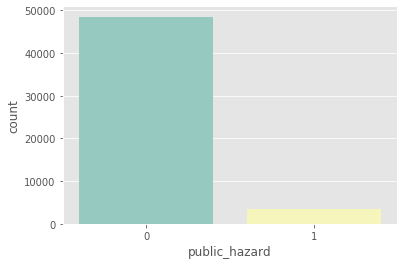

In [169]:
sns.countplot(x='public_hazard', data=df, palette="Set3")

- Así que se utiliza _over-sampling_ para balancear la muestra.

In [170]:
count_class_0, count_class_1 = df.public_hazard.value_counts()

In [171]:
df_class_0 = df[df['public_hazard'] == 0]
df_class_1 = df[df['public_hazard'] == 1]

In [172]:
count_class_0

48485

In [173]:
count_class_1

3396

In [174]:
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_class_1, df_class_0_over], axis=0)
df_test_over.head()

maximum_capacity  violation_rate_percent  \
center_id inspection_date                                             
dc1643    2020-03-12                   56.0                    75.0   
dc2838    2020-03-12                   64.0                    50.0   
dc2997    2020-03-12                   80.0                    37.5   
          2020-03-12                   80.0                    37.5   
          2020-03-12                   80.0                    37.5   

                           total_educational_workers  \
center_id inspection_date                              
dc1643    2020-03-12                             8.0   
dc2838    2020-03-12                            13.0   
dc2997    2020-03-12                            17.0   
          2020-03-12                            17.0   
          2020-03-12                            17.0   

                           public_health_hazard_violation_rate  \
center_id inspection_date                                        
dc1643    2020-03-12                                      25.0   
dc2838    2020-03-12                                      25.0   
dc2997    2020-03-12                                      25.0   
          2020-03-12                                      25.0   
          2020-03-12                                      25.0   

                           critical_violation_rate  bronx  brooklyn  \
center_id inspection_date                                             
dc1643    2020-03-12                          75.0    1.0       0.0   
dc2838    2020-03-12                          50.0    0.0       0.0   
dc2997    2020-03-12                          25.0    0.0       0.0   
          2020-03-12                          25.0    0.0       0.0   
          2020-03-12                          25.0    0.0       0.0   

                           manhattan  queens  staten_island  ...  \
center_id inspection_date                                    ...   
dc1643    2020-03-12             0.0     0.0            0.0  ...   
dc2838    2020-03-12             0.0     1.0            0.0  ...   
dc2997    2020-03-12             1.0     0.0            0.0  ...   
          2020-03-12             1.0     0.0            0.0  ...   
          2020-03-12             1.0     0.0            0.0  ...   

                           violaciones_hist_criticas  \
center_id inspection_date                              
dc1643    2020-03-12                            16.0   
dc2838    2020-03-12                             8.0   
dc2997    2020-03-12                             3.0   
          2020-03-12                             3.0   
          2020-03-12                             3.0   

                           violaciones_2019_criticas  ratio_violaciones_hist  \
center_id inspection_date                                                      
dc1643    2020-03-12                             3.0                0.521739   
dc2838    2020-03-12                             3.0                0.555556   
dc2997    2020-03-12                             0.0                0.133333   
          2020-03-12                             0.0                0.133333   
          2020-03-12                             0.0                0.133333   

                           ratio_violaciones_2019  \
center_id inspection_date                           
dc1643    2020-03-12                     0.000000   
dc2838    2020-03-12                     0.444444   
dc2997    2020-03-12                     0.000000   
          2020-03-12                     0.000000   
          2020-03-12                     0.000000   

                           prom_violaciones_hist_borough  \
center_id inspection_date                                  
dc1643    2020-03-12                            0.713809   
dc2838    2020-03-12                            0.620931   
dc2997    2020-03-12                            0.587783   
          2020-03-12                            0.587783   
          20

Random over-sampling:
1    3396
0    3396
Name: public_hazard, dtype: int64


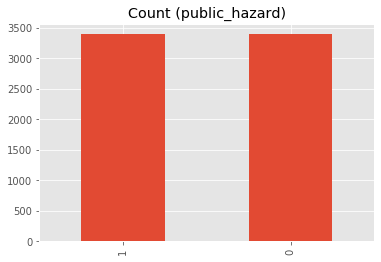

In [175]:
print('Random over-sampling:')
print(df_test_over.public_hazard.value_counts())

df_test_over.public_hazard.value_counts().plot(kind='bar', title='Count (public_hazard)');

In [176]:
df_train = df_test_over.loc[df_test_over['inspection_year'] != 2020] 

In [177]:
df_test = df_test_over.loc[df_test_over['inspection_year'] == 2020]

In [178]:
Y_train = df_train[['public_hazard']]

In [179]:
Y_test = df_test[['public_hazard']]

In [180]:
X_train = df_train[[i for i in df_train.keys() if i not in Y_train]]

In [181]:
X_test = df_test[[i for i in df_test.keys() if i not in Y_test]]

In [182]:
import sklearn as sk
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [183]:
np.random.seed(0)
rforest = RandomForestClassifier(n_estimators=600, class_weight="balanced", max_depth=8, criterion='gini')
rforest.fit(X_train,Y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=600, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [184]:
Y_pred = rforest.predict(X_test)

In [185]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred, average='macro'))
print("Recall:",metrics.recall_score(Y_test, Y_pred, average='macro'))

Accuracy: 0.734
Precision: 0.752923782311117
Recall: 0.7460606060606061


In [186]:
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))

Mean squared error: 0.27


In [187]:
rforest_matrix=metrics.confusion_matrix(Y_test,Y_pred)

In [188]:
pd.DataFrame(rforest_matrix)

,0,1
0,195,30
1,103,172


Text(0.5, 257.44, 'Predicted label')

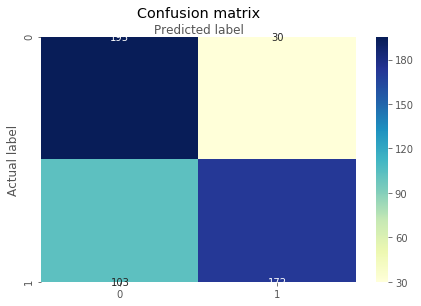

In [189]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(rforest_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [190]:
feature_importance_frame = pd.DataFrame()
feature_importance_frame['features'] = list(X_train.keys())
feature_importance_frame['importance'] = list(rforest.feature_importances_)
feature_importance_frame = feature_importance_frame.sort_values(
        'importance', ascending=False)
feature_importance_frame

,features,importance
33,violation,0.191263
34,violaciones_hist_salud_publica,0.141880
36,violation_critical,0.118787
28,result_1_reinspection_required,0.110555
43,ratio_violaciones_hist_sp,0.066485
3,public_health_hazard_violation_rate,0.051476
29,result_2_fines_pending,0.046208
24,result_1_passed_inspection_with_no_violations,0.029731
32,inspection_year,0.028401
39,ratio_violaciones_hist,0.027112


Modelo XGBoost

In [191]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.datasets import make_classification
import multiprocessing

In [192]:
xg_clas = xgb.XGBClassifier(n_estimators=500, max_depth=3, learning_rate=0.01, subsample=1, objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=multiprocessing.cpu_count())

In [193]:
xg_clas.fit(X_train, Y_train)

C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=1, nthread=12, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [194]:
Y_p = xg_clas.predict(X_test)

In [195]:
rmse = np.sqrt(mean_squared_error(Y_test, Y_p))
print("RMSE: %f" % (rmse))

RMSE: 0.521536


In [196]:
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_p))

Mean squared error: 0.27


In [197]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_p)

In [198]:
pd.DataFrame(cnf_matrix)

,0,1
0,187,38
1,98,177


Text(0.5, 257.44, 'Predicted label')

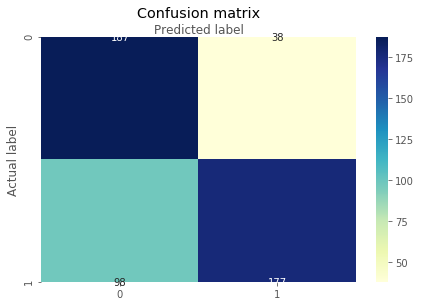

In [199]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [200]:
feature_importance_frame = pd.DataFrame()
feature_importance_frame['features'] = list(X_train.keys())
feature_importance_frame['importance'] = list(xg_clas.feature_importances_)
feature_importance_frame = feature_importance_frame.sort_values(
        'importance', ascending=False)
feature_importance_frame

,features,importance
33,violation,0.348877
36,violation_critical,0.152614
27,result_1_reinspection_not_required,0.134326
28,result_1_reinspection_required,0.129779
34,violaciones_hist_salud_publica,0.106185
21,initial_annual_inspection,0.041201
35,violaciones_2019_salud_publica,0.019655
43,ratio_violaciones_hist_sp,0.019037
22,result_1_None,0.017556
39,ratio_violaciones_hist,0.008570
